# AutoPandas

<img src="logo_autodata.png" alt="drawing" width="200"/>

<center><h2> Process, visualize and use data easily.</h2></center>

In [3]:
import autopandas as apd
%reload_ext autoreload
%autoreload 2

# 1. Read data

#### Easily load CSV, AutoML or pd.DataFrame.

ad.AutoData is a subclass of pd.DataFrame representing 2D data frames:
* Examples are in rows
* Features are in columns

In [17]:
input_file = 'autopandas/data/wine.csv' # wine, adult, diabetes, iris, mushrooms, seeds, squares1-2, titanic, boston
data = apd.read_csv(input_file)

**Keys:**
* **Row**: train, valid, test, header
* **Column**: X, y, categorical, numerical

In [5]:
data.indexes['numerical']

[]

#### Get a subset of data

In [6]:
data.get_data('header')
#data.get_data('X_header')           # five first rows of X (examples without the class target)
#data.get_data('categorical_header') # five first rows of categorical variables
#data.get_data('y_test')             # test set of target
#data.get_data('numerical_header')   # five first rows of numerical variables

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


#### Set the target variable (class) if needed

In [7]:
#data.set_class('quality') 
#data.set_class(['age', 'fnlwgt']) #['income', 'gender'] # multiclass
data.set_class('class')

#data.train_test_split(test_size=0.3) # already done automatically

### Descriptors

In [8]:
print(data.get_task())
print(data.shape)
print(data.ratio()) # ratio dimension / number of examples
print(data.symbolic_ratio())  # ratio of symbolic attributes
print(data.missing_ratio())   # ratio of missing values
print(data.class_deviation()) # 
print(data.skew().max())  # max skewness
print(data.skew().mean()) # mean skewness
data.describe()

classification
(8124, 23)
0.002831117676021664
0.0
0.0
nan
nan
nan


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# 2. Processings


Parameters: **method** and **key** (targeted set).

**Missing values imputation**

In [9]:
data = data.imputation() # mean, median, remove, most

**Encoding**

In [10]:
data = data.encoding('label', 'categorical') # encode categorical variables
#data = data.encoding('one_hot', 'categorical',) # one_hot, likelihood, count, target, etc.

#data.encoding('drop', 'numerical') # simply drop numerical columns

**Normalization**

In [11]:
data = data.normalization('standard', 'numerical') # min-max, standard
#data2 = data.normalization('min-max', 'numerical')

In [12]:
data.min(axis=0)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int8

#### Synthetic Data Vault

In [10]:
# encode
sdv_data, limits, min_max = apd.sdv.encode(data)
# do something
new_data = sdv_data
# decode
data = apd.sdv.decode(new_data, data, limits, min_max)

#### Dimensionality reduction

In [13]:
data.reduction(method='hashing').get_data('header') # pca, lda, tsne, feature_hashing

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,42.0,-0.146041,-38.0,-30.0,-72.255441,64.0,0.0,0.945315
1,0.0,0.0,66.0,-0.216825,-19.0,-15.0,-67.612747,39.0,0.0,1.013383
2,0.0,0.0,6.0,0.184285,-81.0,-18.0,-68.239155,104.0,0.0,0.750833
3,0.0,0.0,9.0,1.080885,-38.0,-32.0,-87.563781,49.0,0.0,-0.260472
4,0.0,0.0,55.0,0.231475,-44.0,-46.0,-74.789816,-5.0,0.0,1.071728


# 3. Visualization

#### Class distribution

y set plot


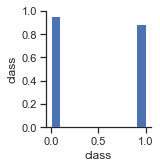

In [48]:
data.plot('y') # alias data.get_data('y').plot()

#### 2D PCA plot

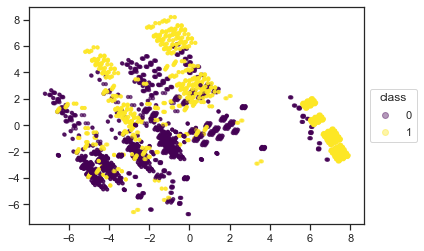

In [49]:
# for class coloration: c=data.get_data('y')
# class is used for coloration by default but the dimensionality reduction erased the class column
data.pca(n_components=2).plot(c=data.get_data('y'))

#### T-SNE

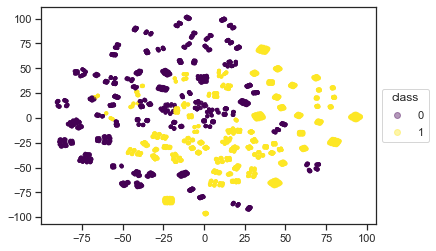

In [50]:
data.tsne().plot(c=data.get_data('y'))

#### Linear Discriminant Analysis

/usr/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


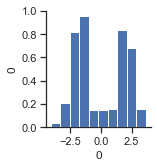

In [51]:
data.get_data('train').lda(n_components=2).plot(c=data.get_data('y_train'))

#### Heatmap

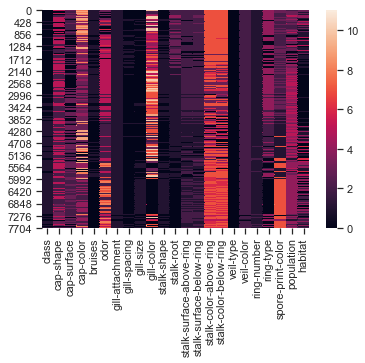

In [52]:
data.plot() # alias data.heatmap()

#### Correlation matrix plot

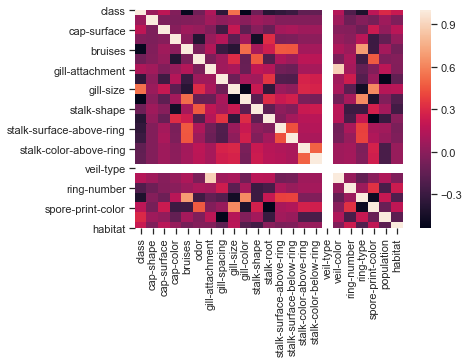

In [53]:
data.corr().plot() # alias data.correlation()

#### Features pairplot

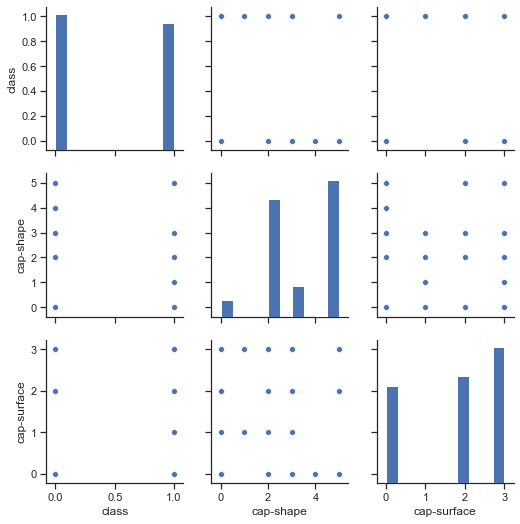

In [54]:
data[data.columns[:3]].pairplot() # max_features is set to 12 by default

#### Features boxplot

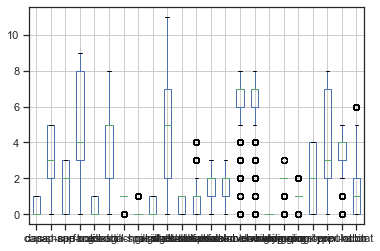

In [55]:
data.boxplot()

# 4. Benchmark

#### Compute a model's score on the task

By default, the method naturally train model on train set and test it on test set.

In [56]:
#data.set_class('income')
data.score()

1.0

In [37]:
# score on another target
#data.set_class('pH')
#data.score()

#### Compute score with custom model and scoring function

In [57]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

data.score(model=LogisticRegression(), metric=f1_score)

0.9495017187731164

#### Call auto-sklearn

In [40]:
# data.score(method='automatic')

# 5. Comparison

#### Two similar datasets (subsets of the same distribution)

In [22]:
ad1 = apd.read_csv('autopandas/data/squares1.csv') # CSV separator is infered automatically
ad2 = apd.read_csv('autopandas/data/squares2.csv')

### 3 types of distances:

#### 1) Between points/columns
* L0, Euclidean and more
* Kolmogorov-Smirnof, Jensen-Shannon, Mutual information

#### 2) Between distributions (datasets)

#### Default: nn_discrepancy

In [35]:
ad1.distance(ad2)

0.026799842170199373

#### Nearest Neihbors Adversarial Accuracy

In [51]:
ad1.distance(ad2, method='nnaa')

0.44

* Euclidean?
* MMD?
* etc.

#### Adversarial score / Binary classification / Discriminant / Classifier score

In [36]:
print(ad1.distance(ad2, method='discriminant'))

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(20, 20))
print(ad1.distance(ad2, method='discriminant', model=model))

0.5356410256410257
0.5087179487179487


#### Task score
Some possible parameters: model, metric.

In [37]:
ad1.set_class('0.0.29')
ad2.set_class('0.0.29')
print(ad1.score(verbose=True)) # Trained on ad1 and tested on ad1 (with split)
print(ad2.score()) # Trained on ad2 and tested on ad2 (with split)
print(ad1.score(test=ad2)) # Trained on ad1 and tested on ad2
print(ad2.score(test=ad1)) # Trained on ad2 and tested on ad1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1172
         1.0       1.00      1.00      1.00       759
         5.0       1.00      1.00      1.00       169

   micro avg       1.00      1.00      1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100

Metric: <function accuracy_score at 0x7fbbf1a37b70>
0.9995238095238095
0.9994444444444445
0.998999833305551
0.9992856122303186


### Overlay plot

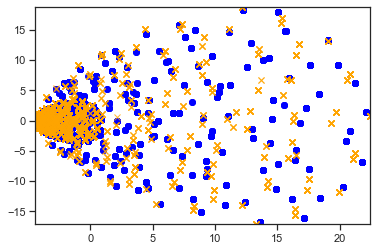

In [38]:
pca1 = ad1.pca(n_components=2)
pca2 = ad2.pca(n_components=2)
pca1.plot(ad=pca2) # alias ad.plot(pca1, pca2)

### Marginal plots

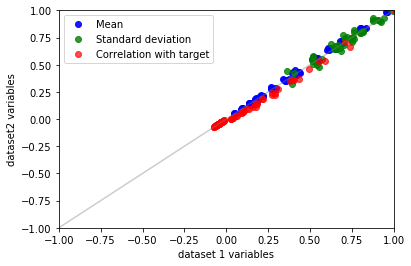

In [25]:
ad1.compare_marginals(ad2, method='all', target='0.0') # if no target, it uses the defined class

# 6. Generation

#### Copy

In [18]:
gen = apd.generators.Copycat()
gen.fit(data)
gen.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2654,6.9,0.400,0.22,5.95,0.081,76.0,303.0,0.99705,3.40,0.57,9.4,5
572,6.7,0.340,0.54,16.30,0.047,44.0,181.0,0.99870,3.04,0.56,8.8,5
3939,6.2,0.270,0.32,6.30,0.048,47.0,159.0,0.99282,3.21,0.60,11.0,6
221,7.2,0.685,0.21,9.50,0.070,33.0,172.0,0.99710,3.00,0.55,9.1,6
1097,6.3,0.230,0.21,5.10,0.035,29.0,142.0,0.99420,3.36,0.33,10.1,7


In [19]:
gendata = gen.sample(data.shape[0])

In [20]:
data.distance(gendata)

0

#### Additive Noise Model

In [47]:
gen = apd.generators.ANM() # use 'model' parameter to use custom model for imputation
gen.fit(data)
gen.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,34,17,34,-0.003183,31,16,-0.729977,-0.422827,22,17,38,3
1,28,85,27,-0.005127,38,6,0.926069,0.358991,39,15,11,1
2,26,48,28,-0.044008,7,49,-0.833186,-0.938312,47,9,75,3
3,37,24,29,-0.876061,35,39,-0.584545,-0.902624,38,22,49,3
4,29,19,30,1.241007,51,19,0.761872,1.328498,23,29,7,4


In [49]:
gen.sample(n=500) # p=0.8 means 20% of data are original data, so this is overfitting and nnaa can be under 0.5
ad.metric.nnaa(data[:500], generated)

0.475

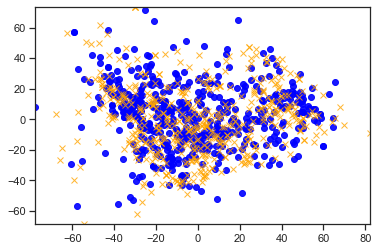

In [50]:
pca1 = data.pca(n_components=2)[:500]
pca2 = gen.sample(n=500).pca(n_components=2)
pca1.plot(ad=pca2)

#### Copula

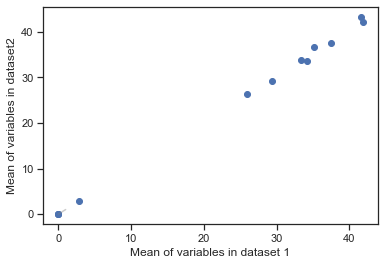

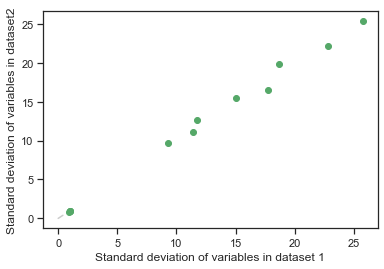

In [41]:
gen = ad.generators.Copula() # use 'model' parameter to use custom model generation (between copula tricks)
gen.fit(data)
data.compare_marginals(gen.sample(n=500), method='mean')
data.compare_marginals(gen.sample(n=500), method='std')

In [ ]:
# Also: 
# - VAE (ad.generators.VAE)
# - GMM (ad.generators.GMM)
# - KDE (ad.generators.KDE)

#### Artificial data

In [141]:
gen = ad.generators.Artificial()
gen.sample(n=5)

,0_X,1,0_y
90,-0.175815,0.983277,0
19,1.662475,-0.161477,1
29,-1.114666,-0.037037,0
28,-0.685150,0.739836,0
99,1.259791,-0.378135,1


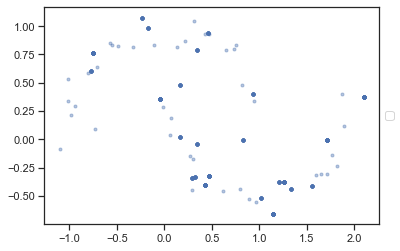

In [143]:
gen.sample(n=100).get_data('X').plot()

In [144]:
gen = ad.generators.Artificial(method='blobs')
gen.sample(n=5)

,0_X,1,0_y
96,9.607131,6.804980,1
29,8.310612,-4.006910,0
64,9.958816,5.650403,1
98,10.163360,-5.257048,0
17,7.822878,-4.201061,2


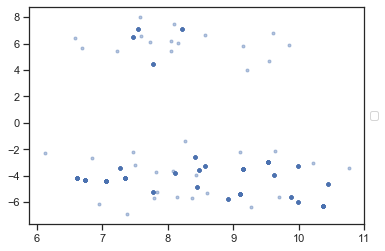

In [145]:
gen.sample(n=100).get_data('X').plot()